In [1]:
# Dependencies
import random
import pickle
import statistics
import numpy as np

from Bio import SeqIO
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from helpers import getStats, plotDict, kmer_count, build_pipeline, plot_confusion_matrix

## Reading the data from pickle file:
 The data file must be a list of tuples with the following format: 
 ```[(label, sequence)]```

In [2]:
filename = 'data.p'

with open(filename, 'rb') as f:
    data = pickle.load(f)
    
print(len(data))

6625


## Get some statistics about the data.

-----------some stats: ------------
total num of classes:  195
total num of samples:  6625
max genome length:  10340
occurences: 
         =>       19
02D      =>        6
41_CD    =>        3
BF       =>       34
A1GHU    =>        1
A1C      =>       75
AC       =>        2
A1GJ     =>        1
02A1F2   =>        2
01DU     =>        1
73_BG    =>        1
03_AB    =>        3
02C      =>        1
A2C      =>        2
A1DG     =>        1
GKU      =>        2
A1A2D    =>        3
55_01B   =>        7
47_BF    =>        5
01A1     =>        5
44_BF    =>        2
17_BF    =>        7
35_AD    =>       20
D        =>       81
53_01B   =>        3
60_BC    =>        3
02B      =>        7
DG       =>        3
16_A2D   =>        4
74_01B   =>        3
A        =>        6
26C      =>        3
46_BF    =>        7
0107     =>       13
85_BC    =>        9
AF2      =>        1
F2KU     =>        1
01F2G    =>        1
02A1G    =>        1
1819     =>        1
51_01B   =>        4
54_01B   

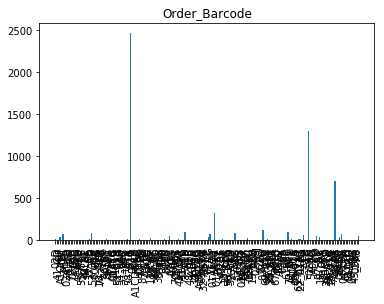

{'': 1, '02D': 2, '41_CD': 3, 'BF': 4, 'A1GHU': 5, 'A1C': 6, 'AC': 7, 'A1GJ': 8, '02A1F2': 9, '01DU': 10, '73_BG': 11, '03_AB': 12, '02C': 13, 'A2C': 14, 'A1DG': 15, 'GKU': 16, 'A1A2D': 17, '55_01B': 18, '47_BF': 19, '01A1': 20, '44_BF': 21, '17_BF': 22, '35_AD': 23, 'D': 24, '53_01B': 25, '60_BC': 26, '02B': 27, 'DG': 28, '16_A2D': 29, '74_01B': 30, 'A': 31, '26C': 32, '46_BF': 33, '0107': 34, '85_BC': 35, 'AF2': 36, 'F2KU': 37, '01F2G': 38, '02A1G': 39, '1819': 40, '51_01B': 41, '54_01B': 42, 'AD': 43, '06U': 44, '06G': 45, '14F1': 46, '71_BF1': 47, '58_01B': 48, 'B': 49, '02G': 50, '0213': 51, '01C': 52, 'A1CDGKU': 53, 'BFG': 54, '01BC': 55, '40_BF': 56, '87_cpx': 57, 'JU': 58, 'A1F2': 59, 'A1GH': 60, 'A2G': 61, '11_cpx': 62, '29_BF': 63, '28_BF': 64, '88_BC': 65, 'ACD': 66, '36_cpx': 67, '39_BF': 68, 'DO': 69, '0708': 70, 'N': 71, '02H': 72, '0108': 73, 'F1': 74, '02GK': 75, 'A1CG': 76, '01F2': 77, '70_BF1': 78, '05_DF': 79, '14_BG': 80, '43_02G': 81, '31_BC': 82, 'A1A2C': 83, '01B

In [3]:
unique_labels = list(set(map(lambda x: x[0], data)))

#get some stats about training and testing dataset
diTrain = getStats(data)
plotDict(diTrain, 'train.png',"Order_Barcode")

# Create Labels for Classes
diLabels = {}
classId = 0;
numClasses = len(diTrain)

for item in diTrain:
    classId += 1
    diLabels[item] = classId;
    
print(diLabels)

## Deleting the misrepresented classes. 

In [4]:
# Select the minimun amount of elements per class
minimum = 25

# Create Labels for Classes
diLabels = {}
classId = 0;
numClasses = len(diTrain)

i = 0
while i < len(data):
    if diTrain[data[i][0]] < minimum: 
        data.pop(i)
    else: 
        i+=1

-----------some stats: ------------
total num of classes:  20
total num of samples:  5883
max genome length:  10340
occurences: 
BF       =>       34
02A1     =>       41
G        =>       75
A1C      =>       75
A1       =>      319
BF1      =>      103
CD       =>       59
C        =>     1299
F1       =>       57
B        =>     2464
BC       =>       85
O        =>       51
07_BC    =>       41
D        =>       81
01B      =>      104
01_AE    =>      707
08_BC    =>       36
A1D      =>       75
02_AG    =>      125
A6       =>       52
-----------------------------------


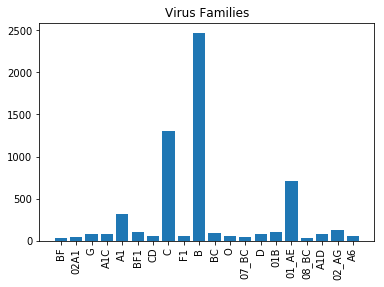

{'BF': 34, '02A1': 41, 'G': 75, 'A1C': 75, 'A1': 319, 'BF1': 103, 'CD': 59, 'C': 1299, 'F1': 57, 'B': 2464, 'BC': 85, 'O': 51, '07_BC': 41, 'D': 81, '01B': 104, '01_AE': 707, '08_BC': 36, 'A1D': 75, '02_AG': 125, 'A6': 52}


In [5]:
# Select the maximum amount of elements per class
maximum = 3000

i = 0
overrepresented_classes = []
while i < len(data):
    if diTrain[data[i][0]] > maximum:
        if labels[i] not in overrepresented_classes:
            overrepresented_classes.append(labels[i])
    i+=1

delete = False
for label in overrepresented_classes:
    count = 0
    i = 0
    while i < len(data):
        if count == maximum:
            delete = True
        if labels[i] == label:
            if not delete:
                count += 1
                i += 1
            else:
                data.pop(i)
                sequences.pop(i)
                labels.pop(i)
        else:
            i += 1
    
# get some stats about the training dataset
diTrain = getStats(data)
plotDict(diTrain, 'virus-families.png','Virus Families')
print(diTrain)

## Simple test without cross validation

In [6]:
# 70% of data for training and 30% for testing
ratio = 0.7
len_train_data = int(len(data) * ratio)

random.shuffle(data)

train = data[:len_train_data]
test = data[len_train_data:]

#Change the path to your convenience.

with open('train.p', 'wb') as f:
    pickle.dump(train, f)

with open('test.p', 'wb') as f:
    pickle.dump(test, f)

## **Training**

In [7]:
k = 5  # Select the value of k that you want to use. 

-----------some stats: ------------
total num of classes:  20
total num of samples:  4118
max genome length:  10340
occurences: 
BF       =>       28
02A1     =>       27
G        =>       58
A1C      =>       63
A1       =>      232
BF1      =>       76
CD       =>       44
C        =>      894
F1       =>       35
B        =>     1718
BC       =>       51
O        =>       35
07_BC    =>       27
D        =>       56
01B      =>       73
01_AE    =>      499
08_BC    =>       25
A1D      =>       54
02_AG    =>       84
A6       =>       39
-----------------------------------


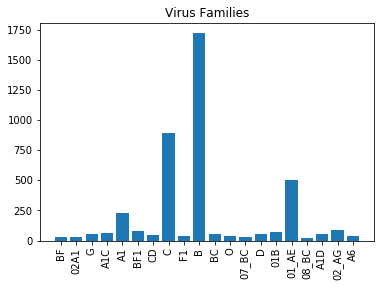

{'BF': 1, '02A1': 2, 'G': 3, 'A1C': 4, 'A1': 5, 'BF1': 6, 'CD': 7, 'C': 8, 'F1': 9, 'B': 10, 'BC': 11, 'O': 12, '07_BC': 13, 'D': 14, '01B': 15, '01_AE': 16, '08_BC': 17, 'A1D': 18, '02_AG': 19, 'A6': 20}


In [8]:
unique_labels = list(set(map(lambda x: x[0], train)))

#get some stats about training and testing dataset
diTrain = getStats(train)
plotDict(diTrain, 'train.png',"Virus Families")

# Create Labels for Classes
diLabels = {}
classId = 0;
numClasses = len(diTrain)

for item in diTrain:
    classId += 1
    diLabels[item] = classId;
    
print(diLabels)

In [9]:
n_train = len(train)
train_features = []
train_labels = []

for i in range(len(train)):
    train_features.append(kmer_count(train[i][1], k))
    train_labels.append(train[i][0])
       
x = np.asarray(train_features).astype('float32')
y = np.asarray(train_labels)

In [10]:
features = normalize(x, norm='l2',axis=1) 
subtypes = np.asarray(train_labels)

In [11]:
print(features.shape)

(4118, 1024)


In [12]:
# Run the classification Pipeline for this subset.
# Here you have the freedom to select your favorite classifier.
# You don't have to follow our pipeline. You can add a CNN or 
# a MLP. 

pipeline = build_pipeline(4**k, 'poly-svm')
pipeline.fit(features, subtypes)

/home/pmillana/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=False, with_std=True)), ('dim_reducer', TruncatedSVD(algorithm='randomized', n_components=103, n_iter=5,
       random_state=None, tol=0.0)), ('classifier', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

## **Testing**

In [13]:
n_test = len(test)

test_features = []
test_labels = []

for i in range(len(test)):
    test_features.append(kmer_count(test[i][1], k))
    test_labels.append(test[i][0])
    
x = np.asarray(test_features).astype('float32')
y = np.asarray(test_labels)


test_features = normalize(x, norm = 'l2', axis = 1) 

-----------some stats: ------------
total num of classes:  20
total num of samples:  1765
max genome length:  9885
occurences: 
BF       =>        6
02A1     =>       14
G        =>       17
A1C      =>       12
A1       =>       87
BF1      =>       27
CD       =>       15
C        =>      405
F1       =>       22
B        =>      746
BC       =>       34
O        =>       16
07_BC    =>       14
D        =>       25
01B      =>       31
01_AE    =>      208
08_BC    =>       11
A1D      =>       21
02_AG    =>       41
A6       =>       13
-----------------------------------


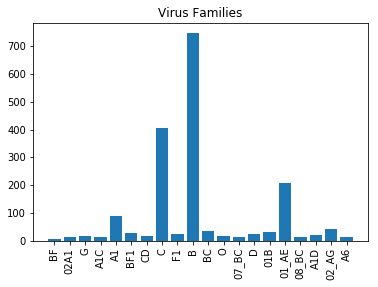

{'BF': 6, '02A1': 14, 'G': 17, 'A1C': 12, 'A1': 87, 'BF1': 27, 'CD': 15, 'C': 405, 'F1': 22, 'B': 746, 'BC': 34, 'O': 16, '07_BC': 14, 'D': 25, '01B': 31, '01_AE': 208, '08_BC': 11, 'A1D': 21, '02_AG': 41, 'A6': 13}


In [14]:
#get some stats about the testing dataset
diTrain = getStats(test)
plotDict(diTrain, 'test.png','Virus Families')
print(diTrain)

In [15]:
y_pred = pipeline.predict(test_features)
print(accuracy_score(y, y_pred))

0.9614730878186969


### **10-fold cross validation**

In [16]:
def training(train_data, k, classifier):
    n_train = len(train_data)
    train_features = []
    train_labels = []

    for i in range(len(train_data)):
        train_features.append(kmer_count(train_data[i][1], k))
        train_labels.append(train_data[i][0])

    x = np.asarray(train_features).astype('float32')
    x = normalize(x, norm='l2', axis=1)
    y = np.asarray(train_labels)

    features = normalize(x, norm='l2', axis=1)
    subtypes = np.asarray(train_labels)

    # Run the classification Pipeline for this subset.
    pipeline = build_pipeline(4 ** k, classifier)
    pipeline.fit(features, subtypes)

    return pipeline

In [19]:
def testing(test_data, k, pipeline):
    n_test = len(test_data)

    test_features = []
    test_labels = []

    for i in range(len(test_data)):
        test_features.append(kmer_count(test_data[i][1], k))
        test_labels.append(test_data[i][0])

    x = np.asarray(test_features).astype('float32')
    y = np.asarray(test_labels)

    test_features = normalize(x, norm='l2', axis=1)

    y_pred = pipeline.predict(test_features)
    cm = confusion_matrix(y, y_pred)
    #plot_confusion_matrix(cm[:100][:100], test_labels[:100])

    return accuracy_score(y, y_pred)

In [20]:
k = 4
classifiers = ['linear-svm', 'poly-svm', 'rbf-svm', 'lda', 'KNN']

accuracies = {}
index = 0
step = int(len(data) / 10)
random.shuffle(data)

for classifier in classifiers:
    accuracies[classifier] = []

for i in range(10):
    print(i)
    train = data[:index] + data[index + step:]
    test = data[index:index + step]
    index = index + step

    for classifier in classifiers:
        print(classifier)
        pipeline = training(train, k, classifier)
        accuracies[classifier].append(testing(test, k, pipeline))
    print('**************************************************')

print(accuracies)
for classifier in classifiers:
    print('accuracy of ' + classifier + ': ' + str(statistics.mean(accuracies[classifier])))

0
linear-svm
poly-svm


/home/pmillana/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf-svm


/home/pmillana/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LinearDiscriminant
KNN
**************************************************
{'linear-svm': [0.9506802721088435], 'poly-svm': [0.9370748299319728], 'rbf-svm': [0.9217687074829932], 'lda': [0.9302721088435374], 'KNN': [0.9217687074829932]}
accuracy of linear-svm: 0.9506802721088435
accuracy of poly-svm: 0.9370748299319728
accuracy of rbf-svm: 0.9217687074829932
accuracy of LinearDiscriminant: 0.9302721088435374
accuracy of KNN: 0.9217687074829932


In [ ]:
k = 5
classifiers = ['linear-svm', 'poly-svm', 'rbf-svm', 'lda', 'KNN']

accuracies = {}
index = 0
step = int(len(data) / 10)
random.shuffle(data)

for classifier in classifiers:
    accuracies[classifier] = []

for i in range(10):
    print(i)
    train = data[:index] + data[index + step:]
    test = data[index:index + step]
    index = index + step

    for classifier in classifiers:
        print(classifier)
        pipeline = training(train, k, classifier)
        accuracies[classifier].append(testing(test, k, pipeline))
    print('**************************************************')

print(accuracies)
for classifier in classifiers:
    print('accuracy of ' + classifier + ': ' + str(statistics.mean(accuracies[classifier])))

In [ ]:
k = 6
classifiers = ['linear-svm', 'poly-svm', 'rbf-svm', 'lda', 'KNN']

accuracies = {}
index = 0
step = int(len(data) / 10)
random.shuffle(data)

for classifier in classifiers:
    accuracies[classifier] = []

for i in range(10):
    print(i)
    train = data[:index] + data[index + step:]
    test = data[index:index + step]
    index = index + step

    for classifier in classifiers:
        print(classifier)
        pipeline = training(train, k, classifier)
        accuracies[classifier].append(testing(test, k, pipeline))
    print('**************************************************')

print(accuracies)
for classifier in classifiers:
    print('accuracy of ' + classifier + ': ' + str(statistics.mean(accuracies[classifier])))

In [ ]:
k = 7
classifiers = ['linear-svm', 'poly-svm', 'rbf-svm', 'lda', 'KNN']

accuracies = {}
index = 0
step = int(len(data) / 10)
random.shuffle(data)

for classifier in classifiers:
    accuracies[classifier] = []

for i in range(10):
    print(i)
    train = data[:index] + data[index + step:]
    test = data[index:index + step]
    index = index + step

    for classifier in classifiers:
        print(classifier)
        pipeline = training(train, k, classifier)
        accuracies[classifier].append(testing(test, k, pipeline))
    print('**************************************************')

print(accuracies)
for classifier in classifiers:
    print('accuracy of ' + classifier + ': ' + str(statistics.mean(accuracies[classifier])))